In [2]:
import pandas as pd
import pandas.testing as tm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [5]:
iris =  sns.load_dataset('iris')

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


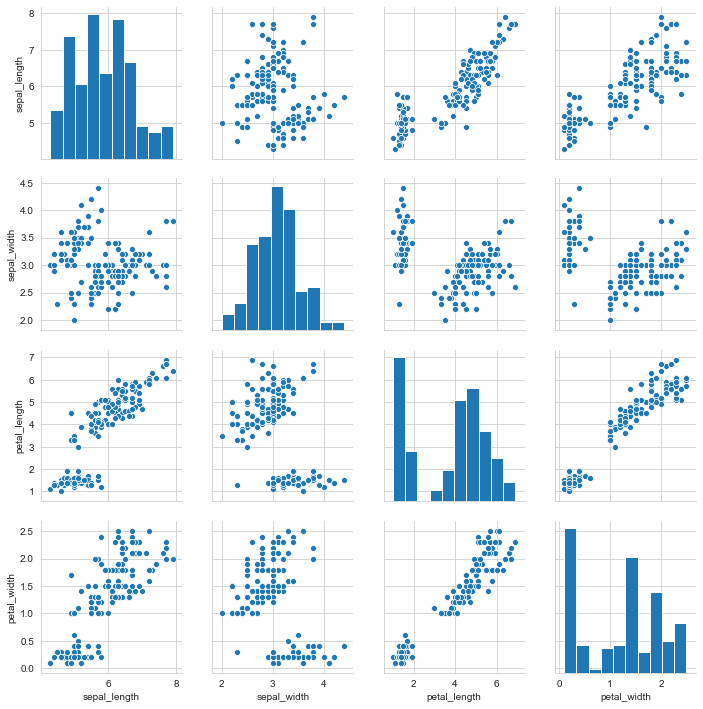

In [10]:
sns.pairplot(iris.dropna())

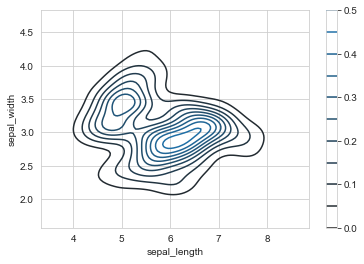

In [11]:
sns.kdeplot(iris['sepal_length'],iris['sepal_width'],cbar=True)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = iris.drop('species',axis = 1)
y = iris['species']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

In [30]:
from sklearn.svm import SVC

In [31]:
sf = SVC()

In [32]:
sf.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [33]:
pr = sf.predict(X_test)

In [34]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
print(classification_report(y_test,pr))
print('/n')
print(confusion_matrix(y_test,pr))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.93      0.93      0.93        15
   virginica       0.94      0.94      0.94        17

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

/n
[[13  0  0]
 [ 0 14  1]
 [ 0  1 16]]


In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
param = {'C':[0.1,0.01,1,0.2,0.02,2,3,4,5,6,7,8,9],'gamma':[0.1,0.01,0.001,3,0.3,2,1,0.09,0.25,0.2,0.004,0.02,0.03]}

In [38]:
gs = GridSearchCV(param_grid=param,estimator=SVC(),verbose=3)

In [39]:
gs.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 169 candidates, totalling 507 fits
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.861, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.914, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.853, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.361, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.343, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.353, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .........

[CV] ..................... C=1, gamma=0.02, score=0.943, total=   0.0s
[CV] C=1, gamma=0.02 .................................................
[CV] ..................... C=1, gamma=0.02, score=0.971, total=   0.0s
[CV] C=1, gamma=0.03 .................................................
[CV] ..................... C=1, gamma=0.03, score=0.917, total=   0.0s
[CV] C=1, gamma=0.03 .................................................
[CV] ..................... C=1, gamma=0.03, score=0.971, total=   0.0s
[CV] C=1, gamma=0.03 .................................................
[CV] ..................... C=1, gamma=0.03, score=0.971, total=   0.0s
[CV] C=0.2, gamma=0.1 ................................................
[CV] .................... C=0.2, gamma=0.1, score=0.861, total=   0.0s
[CV] C=0.2, gamma=0.1 ................................................
[CV] .................... C=0.2, gamma=0.1, score=0.943, total=   0.0s
[CV] C=0.2, gamma=0.1 ................................................
[CV] .

[CV] C=2, gamma=0.2 ..................................................
[CV] ...................... C=2, gamma=0.2, score=0.944, total=   0.0s
[CV] C=2, gamma=0.2 ..................................................
[CV] ...................... C=2, gamma=0.2, score=0.971, total=   0.0s
[CV] C=2, gamma=0.2 ..................................................
[CV] ...................... C=2, gamma=0.2, score=0.971, total=   0.0s
[CV] C=2, gamma=0.004 ................................................
[CV] .................... C=2, gamma=0.004, score=0.861, total=   0.0s
[CV] C=2, gamma=0.004 ................................................
[CV] .................... C=2, gamma=0.004, score=0.914, total=   0.0s
[CV] C=2, gamma=0.004 ................................................
[CV] .................... C=2, gamma=0.004, score=0.941, total=   0.0s
[CV] C=2, gamma=0.02 .................................................
[CV] ..................... C=2, gamma=0.02, score=0.917, total=   0.0s
[CV] C

[CV] C=4, gamma=0.3 ..................................................
[CV] ...................... C=4, gamma=0.3, score=0.972, total=   0.0s
[CV] C=4, gamma=0.3 ..................................................
[CV] ...................... C=4, gamma=0.3, score=0.943, total=   0.0s
[CV] C=4, gamma=0.3 ..................................................
[CV] ...................... C=4, gamma=0.3, score=0.971, total=   0.0s
[CV] C=4, gamma=2 ....................................................
[CV] ........................ C=4, gamma=2, score=0.972, total=   0.0s
[CV] C=4, gamma=2 ....................................................
[CV] ........................ C=4, gamma=2, score=0.943, total=   0.0s
[CV] C=4, gamma=2 ....................................................
[CV] ........................ C=4, gamma=2, score=0.971, total=   0.0s
[CV] C=4, gamma=1 ....................................................
[CV] ........................ C=4, gamma=1, score=1.000, total=   0.0s
[CV] C

[CV] .................... C=5, gamma=0.004, score=0.971, total=   0.0s
[CV] C=5, gamma=0.02 .................................................
[CV] ..................... C=5, gamma=0.02, score=0.944, total=   0.0s
[CV] C=5, gamma=0.02 .................................................
[CV] ..................... C=5, gamma=0.02, score=0.943, total=   0.0s
[CV] C=5, gamma=0.02 .................................................
[CV] ..................... C=5, gamma=0.02, score=0.971, total=   0.0s
[CV] C=5, gamma=0.03 .................................................
[CV] ..................... C=5, gamma=0.03, score=0.944, total=   0.0s
[CV] C=5, gamma=0.03 .................................................
[CV] ..................... C=5, gamma=0.03, score=0.943, total=   0.0s
[CV] C=5, gamma=0.03 .................................................
[CV] ..................... C=5, gamma=0.03, score=0.971, total=   0.0s
[CV] C=6, gamma=0.1 ..................................................
[CV] .

[CV] ...................... C=8, gamma=0.2, score=0.971, total=   0.0s
[CV] C=8, gamma=0.2 ..................................................
[CV] ...................... C=8, gamma=0.2, score=1.000, total=   0.0s
[CV] C=8, gamma=0.004 ................................................
[CV] .................... C=8, gamma=0.004, score=0.917, total=   0.0s
[CV] C=8, gamma=0.004 ................................................
[CV] .................... C=8, gamma=0.004, score=0.943, total=   0.0s
[CV] C=8, gamma=0.004 ................................................
[CV] .................... C=8, gamma=0.004, score=0.971, total=   0.0s
[CV] C=8, gamma=0.02 .................................................
[CV] ..................... C=8, gamma=0.02, score=0.944, total=   0.0s
[CV] C=8, gamma=0.02 .................................................
[CV] ..................... C=8, gamma=0.02, score=0.943, total=   0.0s
[CV] C=8, gamma=0.02 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done 507 out of 507 | elapsed:    1.6s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 0.01, 1, 0.2, 0.02, 2, 3, 4, 5, 6, 7, 8, 9],
                         'gamma': [0.1, 0.01, 0.001, 3, 0.3, 2, 1, 0.09, 0.25,
                                   0.2, 0.004, 0.02, 0.03]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [40]:
gs.best_estimator_

SVC(C=6, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [41]:
gs.best_params_

{'C': 6, 'gamma': 0.3}

In [42]:
prediction = gs.predict(X_test)

In [43]:
print(classification_report(y_test,prediction))
print('/n')
print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.93      0.97        15
   virginica       0.94      1.00      0.97        17

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

/n
[[13  0  0]
 [ 0 14  1]
 [ 0  0 17]]
